# Naive Bayes Classifier Demo

1) Load Iris data set, we use only the 3rd and 4th feature as feature vectors X, and partition it into 3-way cross validation. We create a 150 x 3 Label matrix so that a class 1 sample  is labeled as 1 0 0 , a class 2 sample 0 1 0 and a class 3 sample 0 0 1.  

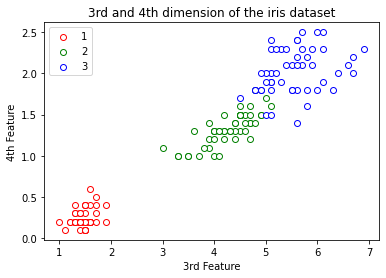

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

tmp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.csv',header=None).to_numpy()
X = tmp[:,2:4]        # 150 x 2
K = np.shape(tmp)[0]  # K = 150 = # of feature vectors, size of training data set.
C = 3     # Number of class labels
# tmp[:,4] contains labels 1,2, or 3.
# Below, we convert the label vector tmp[:,4] to a K x 3 matrix label. 
# Each row is a 1 in 3 encoding of the corresponding label. 
Label = [tmp[:,4] == 1, tmp[:,4] == 2, tmp[:,4] == 3]

# Scatter plot the 2D data.

plt.scatter(X[Label[0],0],X[Label[0],1],c='white', edgecolors = 'red')
plt.scatter(X[Label[1],0],X[Label[1],1],c='white',edgecolors = 'green')
plt.scatter(X[Label[2],0],X[Label[2],1],c='white',edgecolors ='blue')
plt.xlabel('3rd Feature'), plt.ylabel('4th Feature')
plt.title('3rd and 4th dimension of the iris dataset')
plt.legend([1,2,3])
plt.show()



First, we use the entire Iris dataset as training data and develop a Naive Bayesian classifier, nbc, and visualize the decision region the classifier implements.

In [ ]:
nbmodel = nbc(X,np.mat(Label).T)
out = nbclassify(nbmodel, X)
Cmat = np.mat(Label)*out
print('Confusion Matrix when substituting training data for testing: ')
print(Cmat)

Confusion Matrix when substituting training data for testing: 
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


Resubstitution error (a.k.a. training error) is the probability of mis-classification when the training data is also used as testing (or validation) data. 

In [ ]:
Er_resubstitution = 1 - np.sum(np.diag(Cmat))/np.sum(Cmat)
print("Resubstitution Error: " + str(Er_resubstitution))

Resubstitution Error: 0.020000000000000018


**Plot training samples that are mis-classified:** 

First compute a K x C matrix tmp = out - Label; Entries of tmp are all 0 if correctly classified. Otherwise the row will have 1 entry equals to +1 and another entry = -1. 

Therefore, we sum up each row of the absolute value of tmp will yield a K x 1 vector whose value equals to 0 if that sample is correctly classified, and 2 if not. 

We use Matlab command find to find indices of those entries equal to 2.

[ 70 119 133]


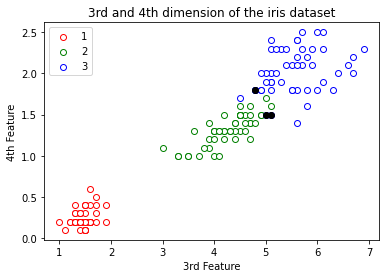

In [ ]:
tmp = out - np.mat(Label).T
idxmis,_ = np.nonzero(np.sum(np.abs(tmp),1))
print(idxmis)

plt.scatter(X[Label[0],0],X[Label[0],1],c='white', edgecolors = 'red')
plt.scatter(X[Label[1],0],X[Label[1],1],c='white',edgecolors = 'green')
plt.scatter(X[Label[2],0],X[Label[2],1],c='white',edgecolors ='blue')
plt.scatter(X[idxmis,0],X[idxmis,1],c='black')
plt.xlabel('3rd Feature'), plt.ylabel('4th Feature')
plt.title('3rd and 4th dimension of the iris dataset')
plt.legend([1,2,3])
plt.show()

# Naive Bayesian Classification with 3-way Cross Validation

Partition indices for 3-way cross validation, stratified with respect to each class. In the iris.csv, the first 50 observations (rows) are class 1, the next 50 class 2 and the last 50 class 3. Each partition should contain all 3 classes with similar prior probability distribution. To verify this partition is properly stratified, we compute the prior probaility using the Label matrix.

In [ ]:
Iv = [[]] * 3
Ir = [[]] * 3

for m in range(3):
  Iv[m] = range(m,K,3) # Indices of 10 validation sets.
  Ir[m] = np.setdiff1d(range(K),Iv[m])


Call nbc to create the classifier for each training data partition and validate using nbclassify 

Since there are 3 classes, Give the indices of the training data Ir{m}, and the validation data Iv{m}, the NBC classifier consists of a mean vector mu, a covarince matrix C and a prior probability for each of the 3 classes. 

In [ ]:
ConfusionMatrix = np.zeros((C,C))
for m in range(3):
  NBmodel = nbc(X[Ir[m],:],np.mat(Label).T[Ir[m]])
  out = nbclassify(NBmodel, X[Iv[m],:])
  ConfusionMatrix = ConfusionMatrix + np.mat(Label)[:,Iv[m]]*out

print('Confusion matrix is: ')
print(ConfusionMatrix)

Confusion matrix is: 
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


This is the function nbc that create a classifier object nbmodel using training data (X, Y). Assume each row of X is a 1 x d feature vector of a sample. Feature dimension = d. Each row of Y is an 1 of C encoding of the class label with C classes. The classifier object is a structured data object defined in the end of the function. 

In [ ]:
def nbc(X,Y):
  # Usage: nbmodel = nbc(X,Y)
  # developing a naive Bayesian classifier using
  # X: training featuer, K by d matrix. Each row of X is an
  #    observation, d is the feature dimension, K is the total
  #    number of feature vectors in the training set. 
  # Y: K x C label matrix encoded in 1 of C format where C is the number
  #    of classes

  (K,d) = np.shape(X)
  C = np.shape(Y)[1]
  prp = np.sum(Y,axis=0)/np.sum(Y)
  mu = [[]] * C
  covmat = [[]] * C
  
  for c in range(C):
    idx = (Y[:,c] == 1).A1
    if len(idx) > 1:
      mu[c] =np.mean(X[idx,:],axis=0)
      covmat[c] = np.cov(X[idx,:].T)
    elif len(idx) == 1:
      mu[c] = X[idx,:]
      covmat[c] = np.eye(d)

  nbmodel = {}
  nbmodel['Nsamples'] = K
  nbmodel['FeatureDimension'] = d
  nbmodel['Nclass'] = C
  nbmodel['TrainingSamples'] = X
  nbmodel['TrainingLabels'] = Y
  nbmodel['smean'] = mu
  nbmodel['scov'] = covmat
  nbmodel['prior'] = prp

  return nbmodel

Applying testing data and label to a trained Naive Bayes Classifier to estimate the testing error. 

In [ ]:
import scipy.stats as stats

def nbclassify(nbmodel, X):
  C = nbmodel['Nclass']
  mu = nbmodel['smean']
  covmat = nbmodel['scov']
  Kt = np.shape(X)[0]
  Lh = np.zeros((Kt,C))

  for c in range(C):
    Lh[:,c] = stats.multivariate_normal(mu[c],covmat[c]).pdf(X)

  PosP = np.mat(Lh *  np.diag(nbmodel['prior']))
  out = (PosP - np.max(PosP,axis=1)*np.ones((1,C)) == 0).astype('double')
  
  return out